In [4]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.ndimage as spim
import scipy.io as sio
import imageio
import numpy as np
import skimage.io
from PIL import Image, ImageEnhance
from skimage.morphology import watershed
from skimage import exposure
from matplotlib import cm
from scipy import misc 
from skimage import data, io, filters

In [6]:
imname = 'RandomSpherePackingMicrostructure.raw'

# im = skimage.io.imread(imname).astype(np.ubyte)

data = np.memmap(imname, dtype=np.uint8)
data.shape

(317685375,)

In [7]:
dataShape = data.reshape((565,525,1071))
dataslice = dataShape[:,:,300]
dataslice.shape

(565, 525)

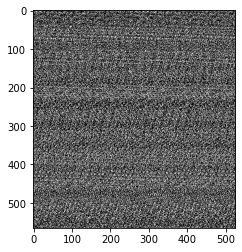

In [8]:
data_eq = exposure.equalize_hist(dataslice)

image = dataslice;

plt.imshow(image,cmap='gray')
plt.show()